# <h1><center>Predictive Analytics for Student Performance</center></h1>

### Objective: Use historical student data to predict academic performance and identify factors affecting grades.

### Outcome: Develop a model to predict student performance and provide insights for educational improvement.

In this notebook, we will  :

- **Predict whether or not a student will pass the final exam based on certain information given**
- **Compare the 2 learning algorithms**
- **Find out what most affects student achievement**
- **Find the best algorithm with high accuracy**

We will be using three learning algorithms:

- **Logistic regression**
- **Gradient Boosting Trees (XGBoost, CatBoost)**

# Reading data

In [30]:
import numpy as np
import pandas as pd
import os
import sys
pd.set_option('display.max_columns', None)
import seaborn as sns
sns.set_theme(style='white', palette='muted', font_scale=0.9)
import matplotlib.pyplot as plt
# from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
confusion_matrix, roc_curve, accuracy_score, f1_score, roc_auc_score, classification_report
)
import joblib
# from astropy.table import Table

# Dataset

In [35]:
df = pd.read_csv('../data/student-data.csv')
df_copy = pd.read_csv('../data/student-data.csv')

**Displaying the dataset**

In [36]:
# first 10 rows
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,yes
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,yes
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,yes
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,no
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,yes
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,yes


In [37]:
df.shape

(395, 31)

In [38]:
# last 10 rows
df.tail(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
385,MS,F,18,R,GT3,T,2,2,at_home,other,other,mother,2,3,0,no,no,yes,no,yes,yes,no,no,5,3,3,1,3,4,2,yes
386,MS,F,18,R,GT3,T,4,4,teacher,at_home,reputation,mother,3,1,0,no,yes,yes,yes,yes,yes,yes,yes,4,4,3,2,2,5,7,no
387,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,0,no
388,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,3,4,1,1,1,0,no
389,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,1,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,0,no
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,yes
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,3,3,3,5,5,no


In [39]:
print(f'The total number of missing values in the dataset is {df.isnull().sum().sum()}.')

The total number of missing values in the dataset is 0.


In [40]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

**Now let's explain every column in the dataframe**
- `school` : student's school (binary: "GP" or "MS")
- `sex` : student's sex (binary: "F" - female or "M" - male)
- `age` : student's age (numeric: from 15 to 22)
- `address` : student's home address type (binary: "U" - urban or "R" - rural)
- `famsize` : family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
- `Pstatus` : parent's cohabitation status (binary: "T" - living together or "A" - apart)
- `Medu` : mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- `Fedu` : father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- `Mjob` : mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
- `Fjob` : father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
- `reason` : reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
- `guardian` : student's guardian (nominal: "mother", "father" or "other")
- `traveltime` : home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- `studytime` : weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- `failures` : number of past class failures (numeric: n if 1<=n<3, else 4)
- `schoolsup` : extra educational support (binary: yes or no)
- `famsup` : family educational support (binary: yes or no)
- `paid` : extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- `activities` : extra-curricular activities (binary: yes or no)
- `nursery` : attended nursery school (binary: yes or no)
- `higher` : wants to take higher education (binary: yes or no)
- `internet` : Internet access at home (binary: yes or no)
- `romantic` : with a romantic relationship (binary: yes or no)
- `famrel` : quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- `freetime` : free time after school (numeric: from 1 - very low to 5 - very high)
- `goout` : going out with friends (numeric: from 1 - very low to 5 - very high)
- `Dalc` : workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- `Walc` : weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- `health` : current health status (numeric: from 1 - very bad to 5 - very good)
- `absences` : number of school absences (numeric: from 0 to 93)

**The last column:**
- `passed` : did the student pass the final exam or not (binary: yes or no)

## Data processing

In [42]:
df['passed'].value_counts()

passed
yes    265
no     130
Name: count, dtype: int64

In [43]:
df.select_dtypes(exclude=['number']).columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'passed'],
      dtype='object')

In [44]:
# Get columns of type 'object' or 'category'
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"The number of categorical/non-numerical columns in the dataset is {len(categorical_columns)} and they include the following ::: {categorical_columns}.")

The number of categorical/non-numerical columns in the dataset is 18 and they include the following ::: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'passed'].


In [45]:
# Show value counts for each of these columns
for col in categorical_columns:
    print(f"Value counts for column '{col}':")
    print(df[col].value_counts())
    print("\n" + "-"*40 + "\n")

Value counts for column 'school':
school
GP    349
MS     46
Name: count, dtype: int64

----------------------------------------

Value counts for column 'sex':
sex
F    208
M    187
Name: count, dtype: int64

----------------------------------------

Value counts for column 'address':
address
U    307
R     88
Name: count, dtype: int64

----------------------------------------

Value counts for column 'famsize':
famsize
GT3    281
LE3    114
Name: count, dtype: int64

----------------------------------------

Value counts for column 'Pstatus':
Pstatus
T    354
A     41
Name: count, dtype: int64

----------------------------------------

Value counts for column 'Mjob':
Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64

----------------------------------------

Value counts for column 'Fjob':
Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: count, dtype: int64

------------------------

**Before proceeding further, we need to process the data to ensure it is properly prepared for training machine learning models. Data preprocessing is a crucial step that enhances model performance by handling missing values, encoding categorical features, and scaling features. Below are the functions that will be applied in this process.**

### 1) Encoding Categorical Variables:
Many datasets contain categorical variables, which are non-numeric by nature, and machine learning models often cannot process such values directly. To make these variables usable, we convert categorical values into numerical ones using Scikit-learn’s `LabelEncoder`. The function responsible for this task is:

```python
def encode_categorical_columns(df)
```

   - This function applies `LabelEncoder` to all categorical columns in the dataset, converting them to numeric values.
   - **Why this is important:** Most machine learning algorithms work better or only accept numeric input. Encoding allows the model to interpret categorical variables effectively.

---

### 2) Feature Scaling:
Feature scaling ensures that all the input features have the same scale, which can significantly impact the performance of models, especially those relying on gradient descent optimization (e.g., logistic regression, neural networks). Without scaling, features with larger ranges might dominate the learning process, leading to suboptimal model performance. Here, we apply two types of scaling methods:

#### (a) Min-Max Scaling:
This method scales each feature to a range between 0 and 1 or another defined range. The formula is as follows:

$$ \frac{col - \min(col)}{\max(col) - \min(col)} $$

This normalization method is useful when the distribution of data is unknown or not Gaussian.

- **Function:**
```python
def min_max_scaling(df)
```
This function replaces each column with its normalized value based on the min-max scaling method, which brings all values between 0 and 1.

#### (b) Standardization (Z-score scaling):
Standardization rescales features so that they have the properties of a standard normal distribution (mean of 0 and standard deviation of 1). The formula is:

$$ \frac{col - mean(col)}{std(col)} $$

Where:
- $mean(col)$: Mean of the column
- $std(col)$: Standard deviation of the column

This method is especially useful when the data follows a Gaussian (normal) distribution.

- **Function:**
```python
def standard_scaling(df)
```
This function applies standardization to the dataset, ensuring that each feature is rescaled using the Z-score.

**Why use both methods?**
- **Min-Max Scaling** is useful for algorithms that rely on distances, such as K-Nearest Neighbors or neural networks, where bounded ranges help convergence.
- **Standardization** is ideal for algorithms like Support Vector Machines and Logistic Regression, which assume normally distributed data.

**Function Invocation:**
- To apply these scaling techniques, simply call the relevant function:
```python
scaled_df = feature_scaling(df)
```

**By scaling the data**, we ensure that each feature contributes proportionally to the learning algorithm, thus speeding up convergence and improving model performance.

In [46]:
# from sklearn.preprocessing import LabelEncoder

# # Function to encode columns and display unique original and mapped values
# def encode_categorical_columns(df, categorical_columns):
#     # Loop over each categorical column
#     for col in df[categorical_columns].columns:
#         le = LabelEncoder()
#         original_values = df[col].copy()  # Keep original values
#         df[col] = le.fit_transform(df[col])  # Encode the column

#         # Get unique pairs of original and encoded values
#         unique_mappings = set(zip(original_values, df[col]))

#         # Display original and encoded values
#         print(f"Column: '{col}'")
#         print("Original -> Encoded (Unique Values)")
#         for orig, encoded in unique_mappings:
#             print(f"{orig} -> {encoded}")
#         print("\n")

# # Call the function to encode and display unique mappings
# encode_categorical_columns(df, categorical_columns=categorical_columns)

In [47]:
module_path = os.path.abspath(os.path.join('..')) # Assuming notebook is in src/
if module_path not in sys.path:
    sys.path.append(module_path)

from utils.preprocessing import (
    apply_label_encoders,
    apply_standard_scaler,
    save_json_data # For saving the final feature order
)

In [48]:
PREPROCESSOR_DIR = '../preprocessors'
if not os.path.exists(PREPROCESSOR_DIR):
    os.makedirs(PREPROCESSOR_DIR)

categorical_feature_cols = [
    'school', 'sex', 'address', 'famsize', 'Pstatus',
    'Mjob', 'Fjob', 'reason', 'guardian',
    'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
    'higher', 'internet', 'romantic'
]

all_feature_names_from_app = [ # Re-list from app.py for consistency, or derive
    'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
    'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
    'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
    'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'
]
numerical_feature_cols = [f for f in all_feature_names_from_app if f not in categorical_feature_cols]

# Target column
target_col = 'passed'

In [49]:
from sklearn.preprocessing import LabelEncoder
le_target = LabelEncoder()
df[target_col] = le_target.fit_transform(df[target_col])
joblib.dump(le_target, os.path.join(PREPROCESSOR_DIR, f"{target_col}_label_encoder.joblib"))
print(f"Target variable '{target_col}' mapping: {dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))}")

X = df.drop(columns=[target_col])
y = df[target_col]


X_encoded, fitted_encoders = apply_label_encoders(
    X.copy(),
    categorical_cols=categorical_feature_cols,
    preprocessor_dir=PREPROCESSOR_DIR,
    mode='fit_transform_save'
)

if X_encoded is None:
    raise Exception("Label encoding failed. Check logs.")

Target variable 'passed' mapping: {'no': 0, 'yes': 1}
Successfully saved preprocessor to ../preprocessors\school_label_encoder.joblib
Successfully saved preprocessor to ../preprocessors\sex_label_encoder.joblib
Successfully saved preprocessor to ../preprocessors\address_label_encoder.joblib
Successfully saved preprocessor to ../preprocessors\famsize_label_encoder.joblib
Successfully saved preprocessor to ../preprocessors\Pstatus_label_encoder.joblib
Successfully saved preprocessor to ../preprocessors\Mjob_label_encoder.joblib
Successfully saved preprocessor to ../preprocessors\Fjob_label_encoder.joblib
Successfully saved preprocessor to ../preprocessors\reason_label_encoder.joblib
Successfully saved preprocessor to ../preprocessors\guardian_label_encoder.joblib
Successfully saved preprocessor to ../preprocessors\schoolsup_label_encoder.joblib
Successfully saved preprocessor to ../preprocessors\famsup_label_encoder.joblib
Successfully saved preprocessor to ../preprocessors\paid_label_en

In [50]:
# Apply StandardScaler to numerical features in X_encoded
X_scaled, fitted_scaler = apply_standard_scaler(
    X_encoded, # Use the output from label encoding
    numerical_cols=numerical_feature_cols,
    preprocessor_dir=PREPROCESSOR_DIR,
    mode='fit_transform_save'
)

if X_scaled is None:
    raise Exception("Standard scaling failed. Check logs.")

# X_scaled now contains your fully preprocessed features.

Successfully saved preprocessor to ../preprocessors\standard_scaler.joblib
Successfully saved JSON data to ../preprocessors\numerical_columns_fitted.json


In [52]:
final_feature_order = X_scaled.columns.tolist()
save_json_data(final_feature_order, os.path.join(PREPROCESSOR_DIR, 'final_feature_order.json'))
print(f"Final feature order for models: {final_feature_order}")

Successfully saved JSON data to ../preprocessors\final_feature_order.json
Final feature order for models: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


In [54]:
# from sklearn.preprocessing import StandardScaler

# # Function to apply StandardScaler to non-categorical columns
# def standard_scaling(df, categorical_columns):
#     # Initialize StandardScaler
#     scaler = StandardScaler()

#     # Identify columns that are not categorical (numerical columns)
#     non_categorical_columns = [col for col in df.columns if col not in categorical_columns]

#     # Apply scaling only to non-categorical (numerical) columns
#     df[non_categorical_columns] = scaler.fit_transform(df[non_categorical_columns])

#     # Return the scaled dataframe
#     return df

# df_scaled = standard_scaling(df, categorical_columns=categorical_columns)
# df_scaled

# Exploratory Data Analysis

Firstly we are going to look deeper into each features by using multiple methods of visualisation such as distribution plot ,Density...
After the visualisation we are going to understand wish features are most impactfull for  student's performances.

If you are students,parents or teachers and you care about your kids or students academic performances you might want to have attention for next lectures, wi will provides you with  summary of how you can achieve best social,demographic and school conditions to boost their academics potentials.

In [18]:
# we will use the copy of our original data in this case to perform Exploratory Data Analysis
df_copy

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,yes


In [19]:
print(df_copy.columns.tolist())

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'passed']


In [20]:
import warnings;warnings.filterwarnings('ignore')

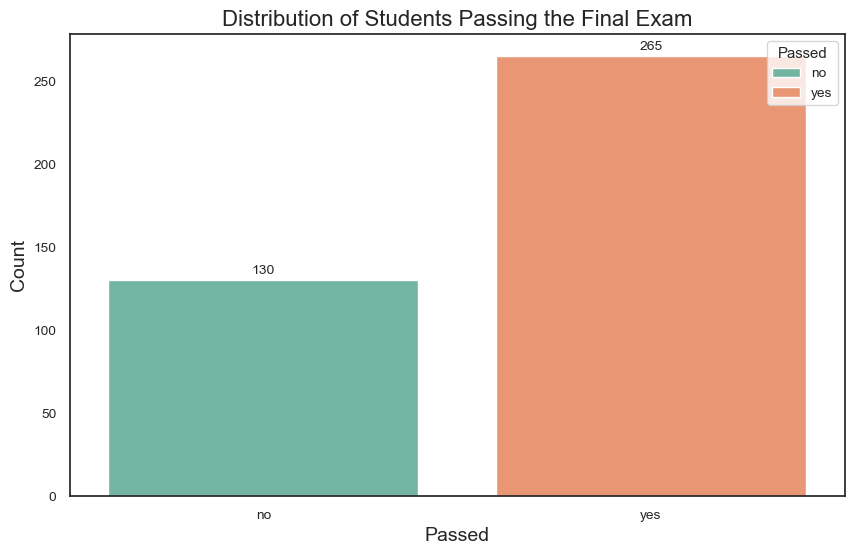

In [ ]:
# Plot the counts of each unique value in 'passed'
plt.figure(figsize=(10, 6))
sns.countplot(data=df_copy, x='passed', palette='Set2')

# Add counts on top of the bars
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 2,
             f'{int(p.get_height())}',
             ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.xlabel('Passed', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Students Passing the Final Exam', fontsize=16)

# Add legend
plt.legend(title='Passed', labels=df_copy['passed'].unique(), loc='upper right')

plt.show();

Text(0.5, 1.0, 'Correlation Heatmap')

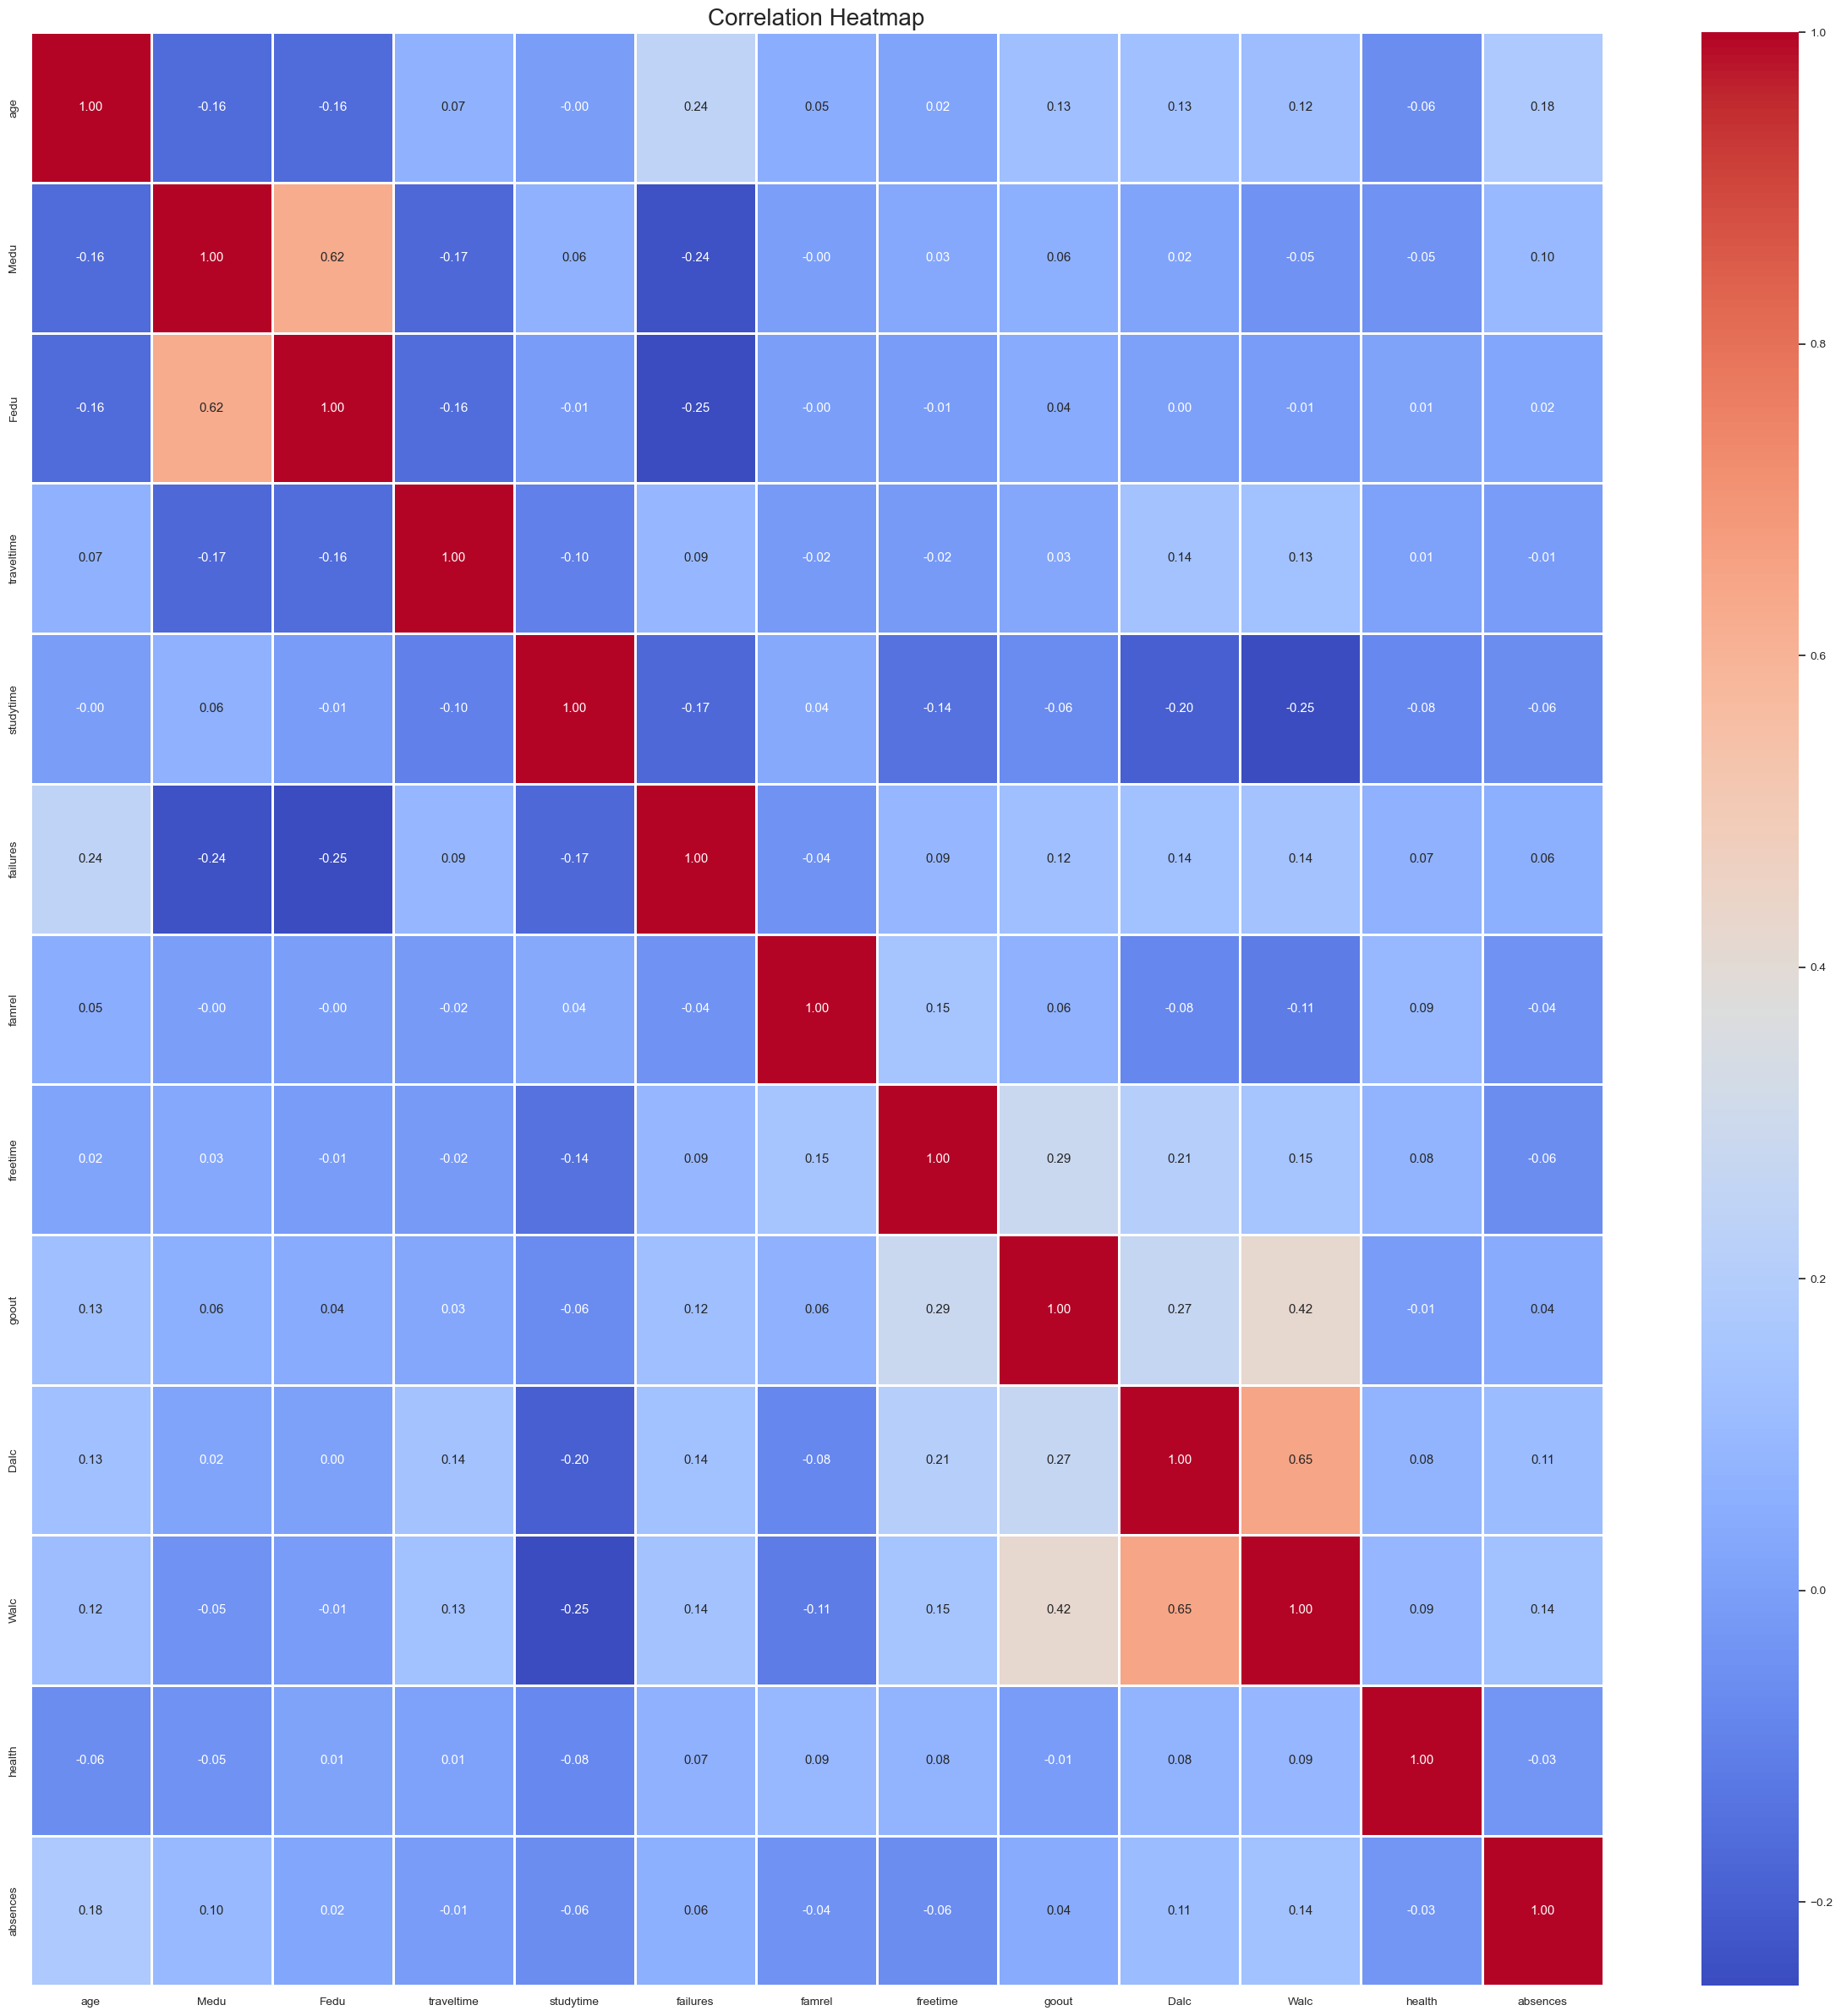

In [20]:
# see correlation between variables through a correlation heatmap
plt.figure(figsize=(30,30))
sns.heatmap(df_copy.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt='.2f', linewidths=2)
plt.title('Correlation Heatmap', fontsize=20)

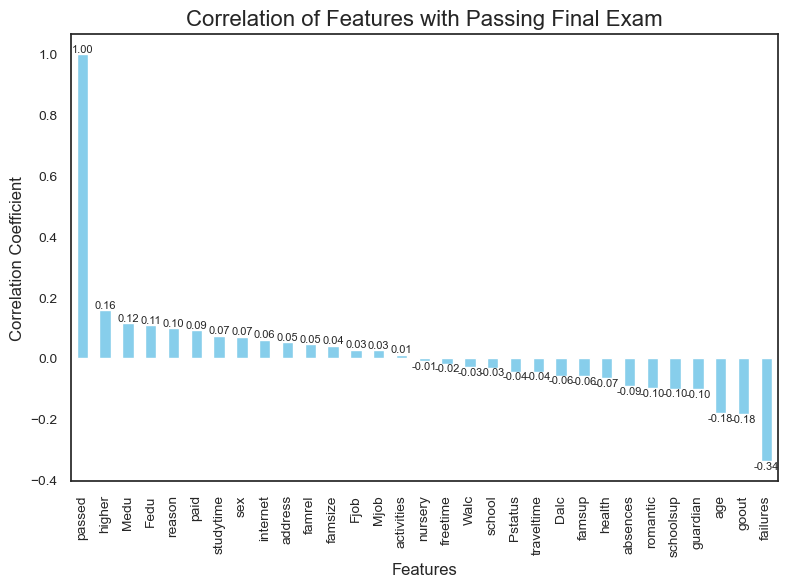

In [21]:
plt.figure(figsize=(8, 6))
df.corr()['passed'].sort_values(ascending=False).plot(kind='bar', color='skyblue')

plt.title('Correlation of Features with Passing Final Exam', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()

for index, value in enumerate(df.corr()['passed'].sort_values(ascending=False)):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom' if value >= 0 else 'top', fontsize=8)

plt.show();

Based on this heatmap we can do a quick conclusion about most impactful features on the status of students passign the final Exam:

**Most Imapctful Features**

- Students hoping to take higher education

- Mother and Father's education status 

**Least Imapctful Features**

- Number of Past Class Failures

- Going out with friends for too much hours can also impact badly

- Age of Student

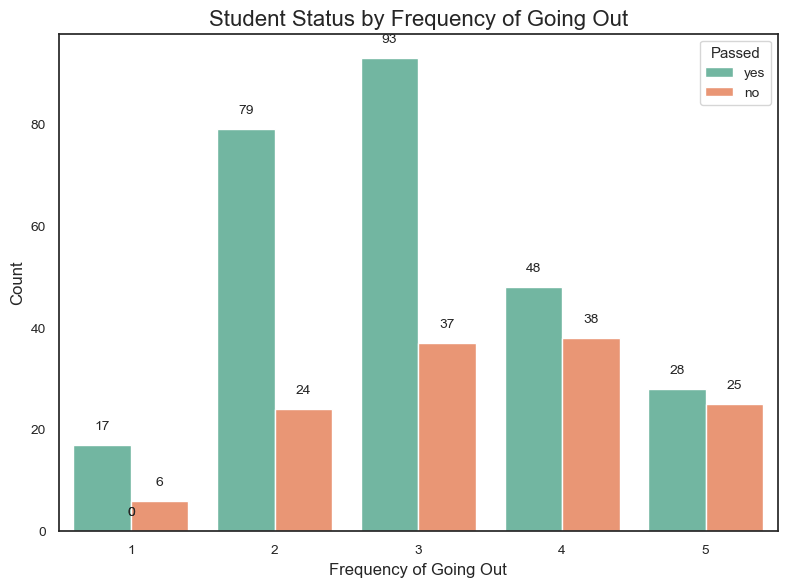

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='goout', hue='passed', data=df_copy, palette='Set2')

plt.title('Student Status by Frequency of Going Out', fontsize=16)
plt.xlabel('Frequency of Going Out', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Passed', loc='upper right')
plt.xticks(rotation=0)

for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 3, f'{int(height)}', ha='center', fontsize=10)

plt.tight_layout()
plt.show();

It seems that most of people who passed the exam had less hour of going out, as a conclusion we should limit the hours of going out with friends unnecessarily.

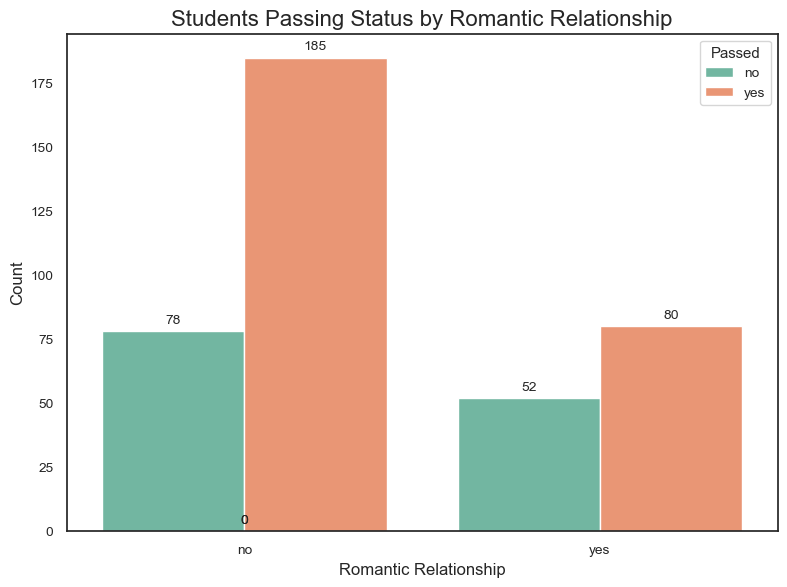

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='romantic', hue='passed', data=df_copy, palette='Set2')

plt.title('Students Passing Status by Romantic Relationship', fontsize=16)
plt.xlabel('Romantic Relationship', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Passed', loc='upper right')
plt.xticks(rotation=0)

for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 3, f'{int(height)}', ha='center', fontsize=10)

plt.tight_layout()
plt.show();

Most of people who passed the exam had no romantic relation. <br> 
Romantic Relationship could be a good choice for better performance.

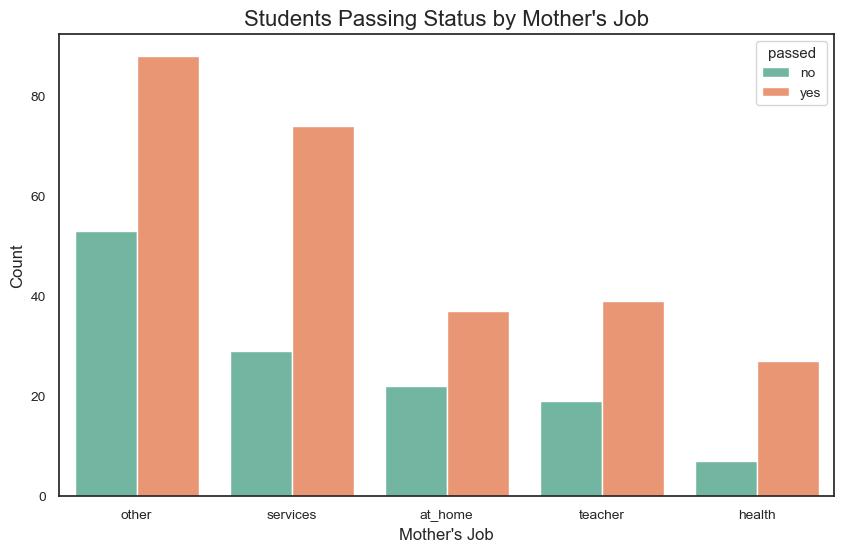

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Mjob', hue='passed', data=df_copy, palette='Set2', order=df_copy['Mjob'].value_counts().index)
plt.title('Students Passing Status by Mother\'s Job', fontsize=16)
plt.xlabel('Mother\'s Job', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show();

Majority of the students that passed have their Mothers working other jobs. 

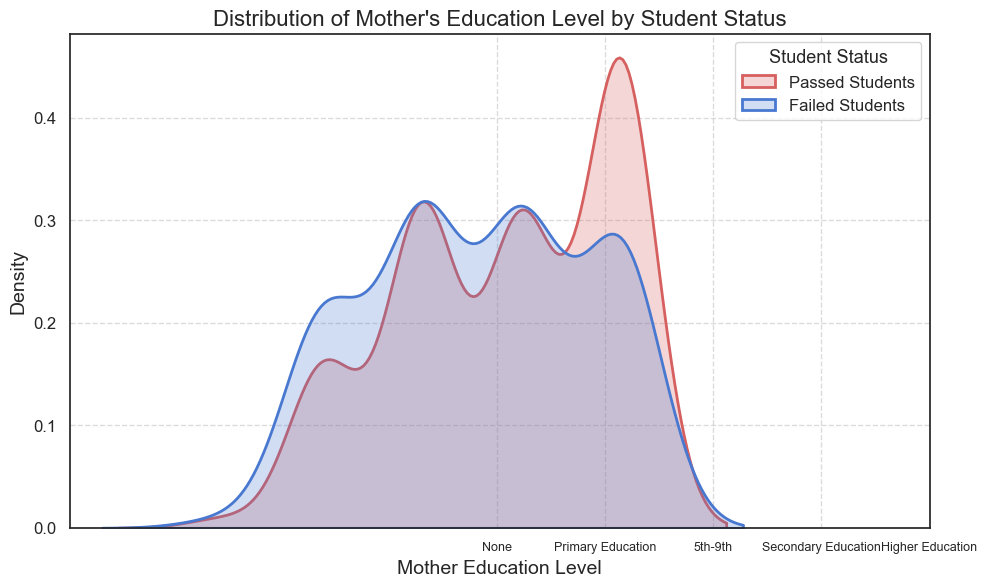

In [ ]:
# Split the data into groups based on 'passed'
passed_students = df.loc[df['passed'] == 1]
failed_students = df.loc[df['passed'] == 0]

# Create new columns for mother education levels
passed_students['Mother Education (Passed)'] = passed_students['Medu']
failed_students['Mother Education (Failed)'] = failed_students['Medu']

plt.figure(figsize=(10, 6))

# Plotting the KDE for both passed and failed students' mother education levels
sns.kdeplot(passed_students['Mother Education (Passed)'],
            shade=True, color="r", label='Passed Students',
            linewidth=2)

sns.kdeplot(failed_students['Mother Education (Failed)'],
            shade=True, color="b", label='Failed Students',
            linewidth=2)

# Adding labels, titles, and legends
plt.title("Distribution of Mother's Education Level by Student Status", fontsize=16)
plt.xlabel('Mother Education Level', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title="Student Status", fontsize=12, title_fontsize=13)

# Customizing the ticks and layout
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['None', 'Primary Education', '5th-9th', 'Secondary Education', 'Higher Education'], fontsize=9)
plt.yticks(fontsize=12)

# Adding a grid for clarity
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show();

Mother Education Level had a good impact in student status of either passing or failing.

<Figure size 1400x700 with 0 Axes>

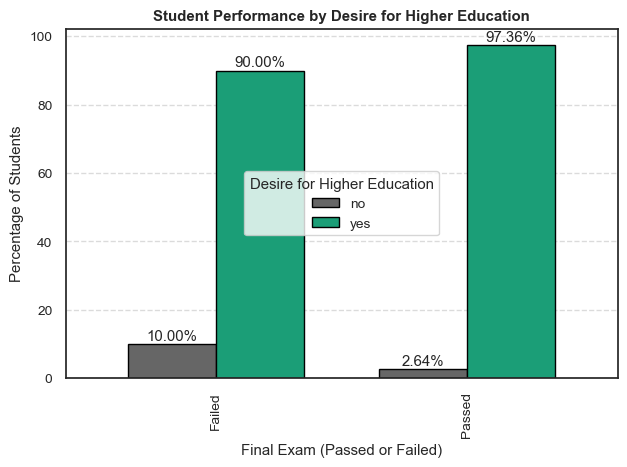

In [26]:
# Crosstab for 'passed' and 'higher'
higher_tab = pd.crosstab(index=df_copy['passed'], columns=df_copy['higher'])

# Calculate percentages for each category
higher_perc = higher_tab.apply(lambda x: x / sum(x) * 100, axis=1)

# Plot the bar chart
plt.figure(figsize=(14, 7))
higher_perc.plot(kind='bar', colormap="Dark2_r", edgecolor='black', width=0.7)

# Add titles and labels
plt.title('Student Performance by Desire for Higher Education', weight='bold')
plt.xlabel('Final Exam (Passed or Failed)')
plt.ylabel('Percentage of Students')

# Adjust legend
plt.legend(title='Desire for Higher Education', loc='center')

# Adding percentage labels on top of each bar
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f%%', label_type='edge', padding=.5)

# Customize tick labels
plt.xticks(ticks=[0, 1], labels=['Failed', 'Passed'])
plt.yticks()

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust the layout to prevent overlap
plt.tight_layout();

plt.show();

Desire to take Higher Education played a strong part in students passing the final Exam with 97.36% of students who passed the final Exam opting to take Higher Education. It could be a good idea to encourage your kids or students to take higher education.

<Figure size 1800x1000 with 0 Axes>

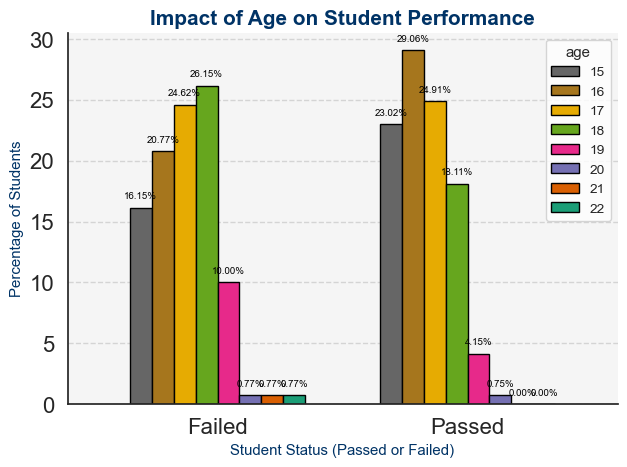

In [27]:
# Crosstab for 'passed' and 'age'
age_tab = pd.crosstab(index=df_copy['passed'], columns=df_copy['age'])

# Calculate percentages for each category
age_perc = age_tab.apply(lambda x: x / sum(x) * 100, axis=1)

# Set figure size larger for better visualization
plt.figure(figsize=(18, 10))
ax = age_perc.plot(kind='bar', colormap="Dark2_r", edgecolor='black', fontsize=16, width=0.7)

# Add titles and labels
plt.title('Impact of Age on Student Performance', weight='bold', color='#003366', fontsize=15)
plt.xlabel('Student Status (Passed or Failed)', color='#003366')
plt.ylabel('Percentage of Students', color='#003366')

# Adjust legend
# plt.legend(title='Age', title_fontsize=18, fontsize=16, loc='upper right', frameon=True, facecolor='white')

# Adding percentage labels with smaller font size
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='edge', fontsize=7, padding=5, color='black')

# Customize tick labels
plt.xticks(ticks=[0, 1], labels=['Failed', 'Passed'], rotation=0)
plt.yticks()

# Add gridlines for better readability and set line properties
plt.grid(axis='y', linestyle='--', alpha=0.8)

# Adjusting the background to make the plot visually appealing
ax.set_facecolor('#F5F5F5')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Tight layout for preventing overlap
plt.tight_layout()

plt.show();

<Figure size 1600x800 with 0 Axes>

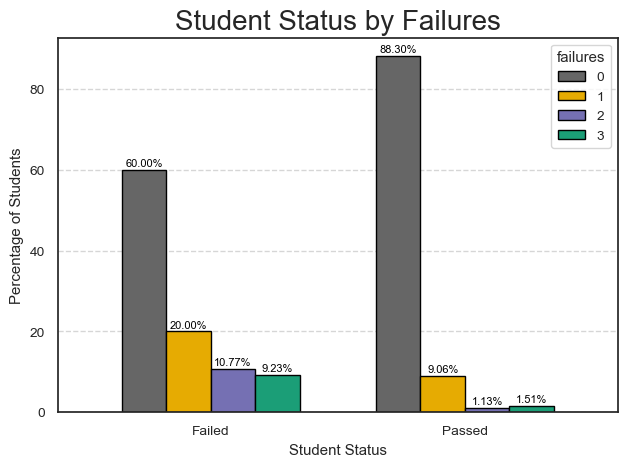

In [28]:
# Crosstab for 'passed' and 'failures' using df_copy
fail_tab = pd.crosstab(index=df_copy['passed'], columns=df_copy['failures'])

# Calculate percentages for each category
fail_perc = fail_tab.apply(lambda x: x / sum(x) * 100, axis=1)

# Set figure size and create bar plot
plt.figure(figsize=(16, 8))
ax = fail_perc.plot(kind='bar', colormap="Dark2_r", edgecolor='black', width=0.7)

# Add title with larger font size
plt.title('Student Status by Failures', fontsize=20)

# Add axis labels without font size modification
plt.xlabel('Student Status')
plt.ylabel('Percentage of Students')

# Adding percentage labels on bars with default font size
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='edge', padding=1, color='black', fontsize=8)

# Customize tick labels and gridlines
plt.xticks(ticks=[0, 1], labels=['Failed', 'Passed'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.8)

# Adjusting the layout to prevent overlap
plt.tight_layout()

plt.show();

Most of the students that passed the final exam has no failures (88.30%) while the majority of those that failed the final exam had the highest number of failures

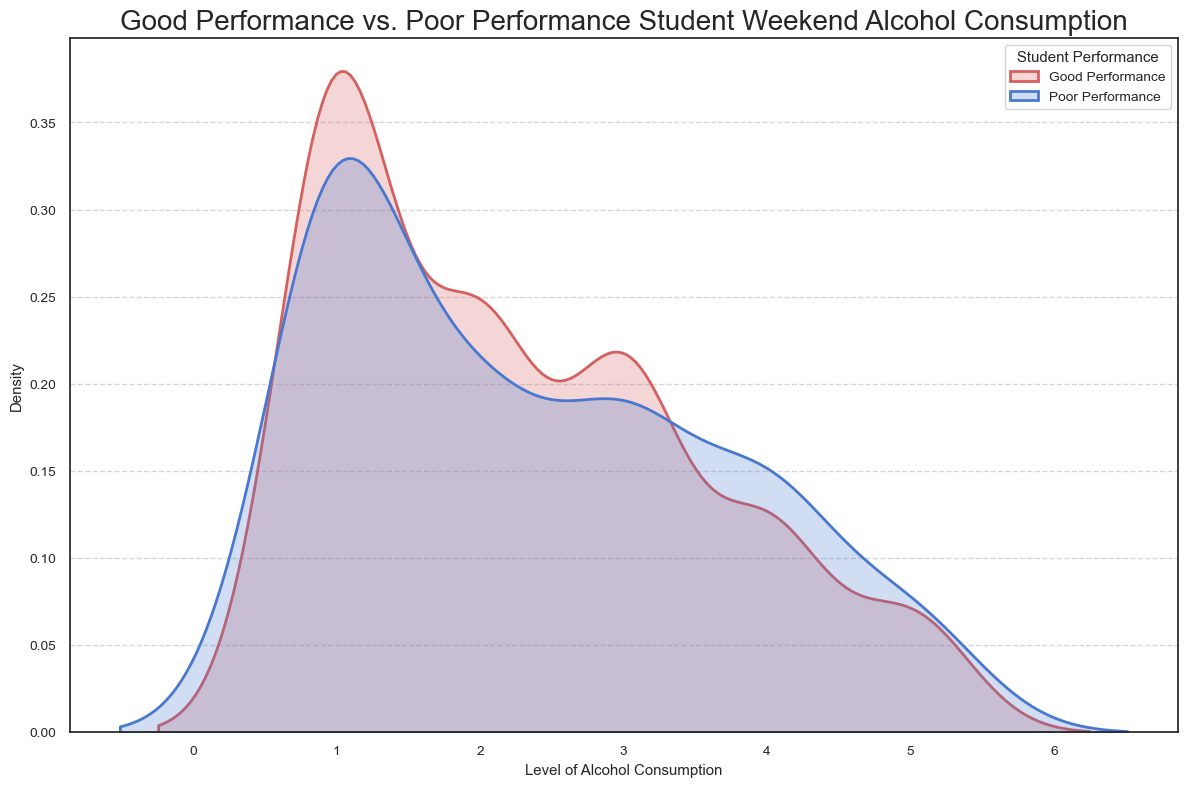

In [29]:
# Create good student dataframe
good = df_copy.loc[df_copy['passed'] == 'yes']
good['good_alcohol_usage'] = good['Walc']

# Create poor student dataframe
poor = df_copy.loc[df_copy['passed'] == 'no']
poor['poor_alcohol_usage'] = poor['Walc']

# Set figure size and plot KDE
plt.figure(figsize=(12, 8))
sns.kdeplot(good['good_alcohol_usage'], shade=True, color="r", label="Good Performance", linewidth=2)
sns.kdeplot(poor['poor_alcohol_usage'], shade=True, color="b", label="Poor Performance", linewidth=2)

# Add plot title with a larger font size
plt.title('Good Performance vs. Poor Performance Student Weekend Alcohol Consumption', fontsize=20)

# Add labels to axes without font size modification
plt.ylabel('Density')
plt.xlabel('Level of Alcohol Consumption')

# Add a legend with proper placement
plt.legend(title="Student Performance", loc='upper right')

# Customize gridlines and layout for better appearance
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()

plt.show();

For weekely alchool consumption it doesn't have an strong impact on student performance .Even people with low consumption had low grad.

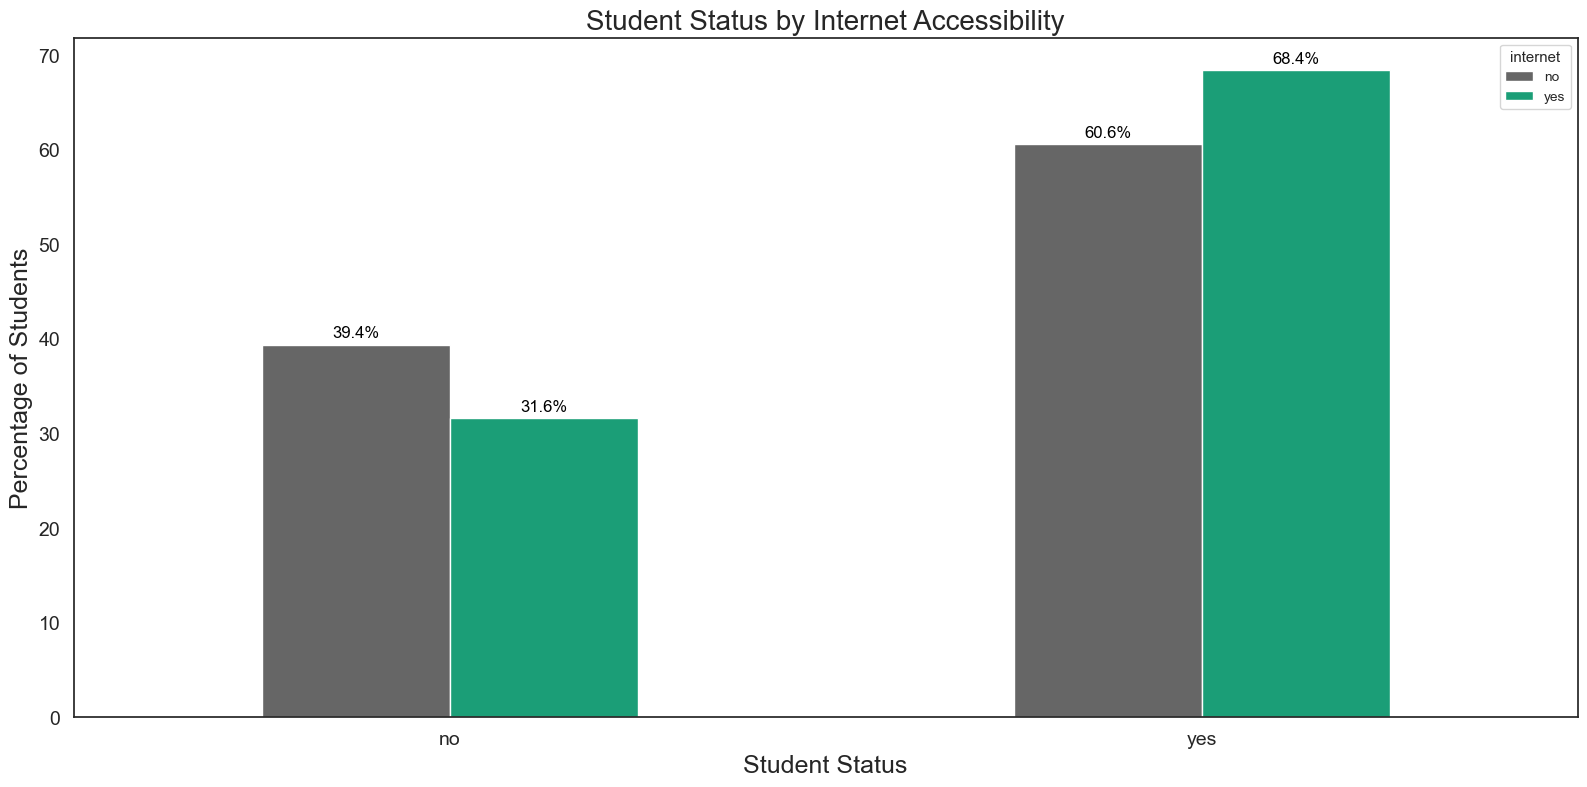

In [ ]:
# Define the perc function to calculate percentages
def perc(x):
    return x / x.sum() * 100

# Create the crosstab for student status by internet accessibility
alc_tab = pd.crosstab(index=df_copy['passed'], columns=df_copy['internet'])

# Calculate percentages
alc_perc = alc_tab.apply(perc)

# Plot the bar chart
ax = alc_perc.plot.bar(colormap="Dark2_r", figsize=(16,8))

# Add plot title
plt.title('Student Status by Internet Accessibility', fontsize=20)

# Add labels to axes
plt.xlabel('Student Status', fontsize=18)
plt.xticks(rotation=0, fontsize=14)
plt.ylabel('Percentage of Students', fontsize=18)
plt.yticks(fontsize=14)

# Add percentage values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Customize layout for better visual appeal
plt.tight_layout()

# Show the plot
plt.show();

A large majority of the students that passed had Internet accesibility while the majority of the students that failed lacked internet accessibility.

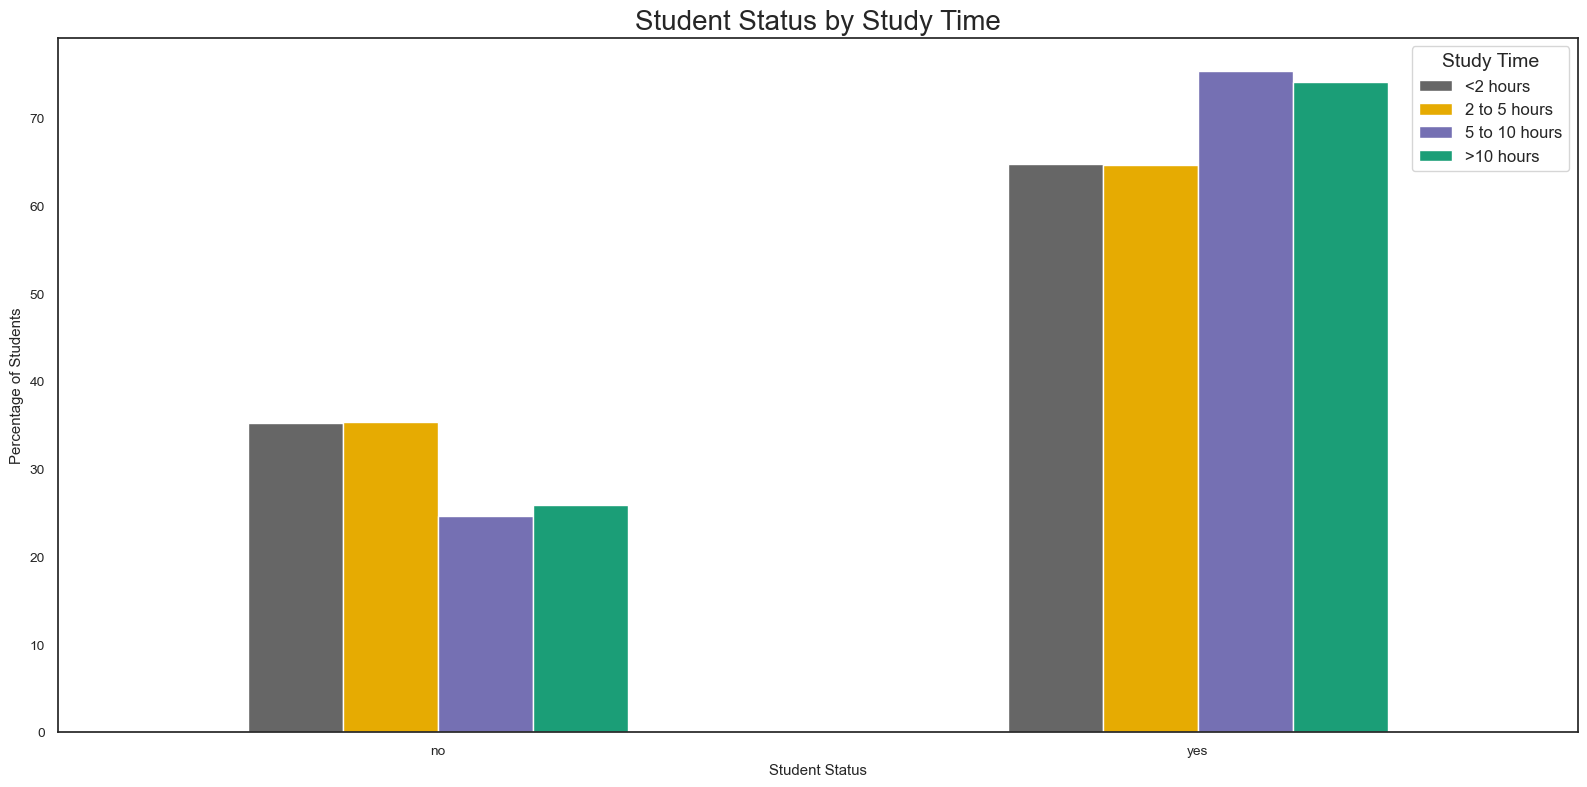

In [ ]:
# Create the crosstab for student status by study time
stu_tab = pd.crosstab(index=df_copy['passed'], columns=df_copy['studytime'])

# Calculate percentages
stu_perc = stu_tab.apply(perc)

# Plot the bar chart
ax = stu_perc.plot.bar(colormap="Dark2_r", figsize=(16,8))

# Add plot title
plt.title('Student Status by Study Time', fontsize=20)

# Add labels to axes
plt.xlabel('Student Status')
plt.xticks(rotation=0)
plt.ylabel('Percentage of Students')

# # Add percentage values on top of the bars
# for p in ax.patches:
#     ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
#                 textcoords='offset points')

# Customize the legend with the mapped values for study time
study_time_legend = {
    1: '<2 hours',
    2: '2 to 5 hours',
    3: '5 to 10 hours',
    4: '>10 hours'
}
handles, labels = ax.get_legend_handles_labels()
labels = [study_time_legend[int(label)] for label in labels]
ax.legend(handles, labels, title='Study Time', fontsize=12, title_fontsize=14)

# Customize layout for better visual appeal
plt.tight_layout()

# Show the plot
plt.show();

Most of people who passed the exam study 5-10 hours weekely

## General conclusion from the EDA

#### Summary:

After dealing with the most relevent features ,the valedictorian of an exellents conditions for heigh academic potentials is likely to have this profile:

1.Does not go out with friend frequently 

2.Is not in romantic relation

3.Parents receive higher education specialy woman

4.Have strong desire to receive higher education 

5.Mother is a health care professional

6.father is a teacher

7.No absences to classes

8.have access to internet

9.study more than 10 hours a week

10.Is healthy

# Machine Learning Model Development

## 1: Logistic Regression Model

### Model Implemetation

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [57]:
# Initialize the Logistic Regression model
lr_model = LogisticRegression(random_state=42)

In [58]:
# Fitting the model on the training data
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [59]:
# Predicting the target values
y_pred = lr_model.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

### Model Evaluation

In [60]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    f1_score,
    precision_score,
    recall_score
)

In [61]:
def evaluate_logistic_regression(model, X_test, y_test):
    """
    Evaluates a logistic regression model on the test data using various metrics.

    Parameters:
    - model: Trained logistic regression model (must have .predict and .predict_proba methods)
    - X_test: Test features
    - y_test: True labels for the test set

    Returns:
    - A dictionary containing all the evaluation metrics
    """
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics and convert to percentage
    accuracy = accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    roc_auc = roc_auc_score(y_test, y_pred_proba) * 100

    # Print the metrics with percentage signs
    print(f"Accuracy Score: {accuracy:.2f}%")
    print(f"F1 Score: {f1:.2f}%")
    print(f"Precision Score: {precision:.2f}%")
    print(f"Recall Score: {recall:.2f}%")
    print(f"ROC-AUC Score: {roc_auc:.2f}%")

    # Print detailed classification report
    print('\n\nClassification Report:')
    print(classification_report(y_test, y_pred))


    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        cbar=False,
        xticklabels=['Predicted Failure', 'Predicted Passed'],
        yticklabels=['Actual Failure', 'Actual Passed']
    )
    plt.title('Confusion Matrix of the Logistic Regression Model')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show();

Accuracy Score: 67.09%
F1 Score: 77.59%
Precision Score: 71.43%
Recall Score: 84.91%
ROC-AUC Score: 60.09%


Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.31      0.38        26
           1       0.71      0.85      0.78        53

    accuracy                           0.67        79
   macro avg       0.61      0.58      0.58        79
weighted avg       0.64      0.67      0.65        79



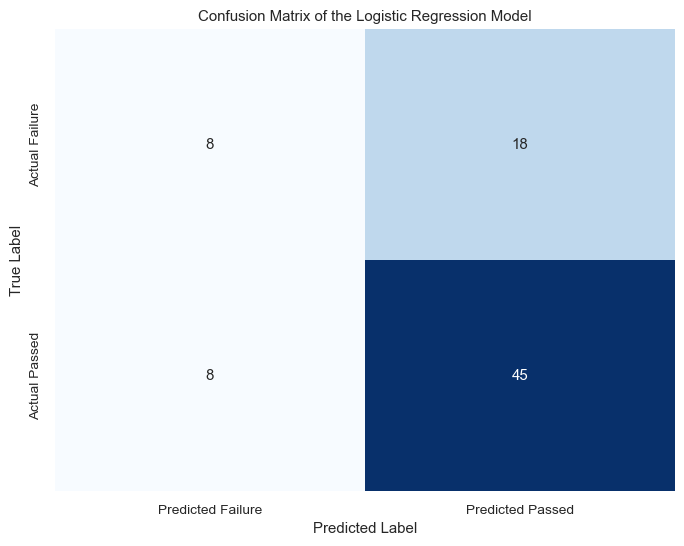

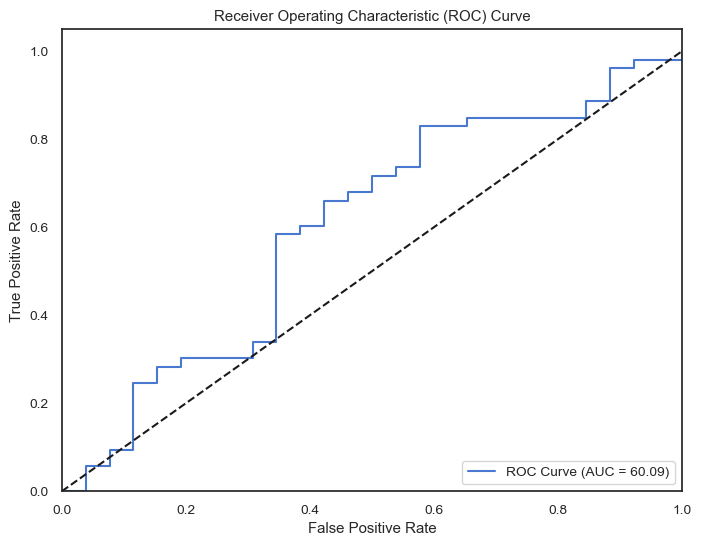

In [62]:
# Evaluate the model using the function
evaluate_logistic_regression(lr_model, X_test, y_test)

In [63]:
joblib.dump(lr_model, '../models/lr_model.joblib')

['../models/lr_model.joblib']

## 2: XGBoost Model

In [64]:
import xgboost as xgb

In [65]:
# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(
    n_estimators=500,        # More trees for better learning
    learning_rate=0.01,      # Moderate learning rate to balance convergence and accuracy
    max_depth=8,             # Limits tree depth to prevent overfitting
    random_state=42,         # Ensures reproducibility
    use_label_encoder=False,  # Prevents warning messages
    eval_metric='logloss',
    objective='binary:logistic'
)

xgb_model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    # early_stopping_rounds=10,
    verbose=False
)

c:\Users\Dell\anaconda3\envs\raqib\lib\site-packages\xgboost\core.py:158: UserWarning: [22:52:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [66]:
# Predicting the target values
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

### Model Evaluation

In [67]:
def evaluate_xgboost(model, X_test, y_test):
    """
    Evaluates an XGBoost model on the test data using various metrics.

    Parameters:
    - model: Trained XGBoost model (must have .predict and .predict_proba methods)
    - X_test: Test features
    - y_test: True labels for the test set

    Returns:
    - A dictionary containing all the evaluation metrics
    """
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics and convert to percentage
    accuracy = accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    roc_auc = roc_auc_score(y_test, y_pred_proba) * 100

    # Print the metrics with percentage signs
    print(f"Accuracy Score: {accuracy:.2f}%")
    print(f"F1 Score: {f1:.2f}%")
    print(f"Precision Score: {precision:.2f}%")
    print(f"Recall Score: {recall:.2f}%")
    print(f"ROC-AUC Score: {roc_auc:.2f}%")

    # Print detailed classification report
    print('\n\nClassification Report:')
    print(classification_report(y_test, y_pred))

    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        cbar=False,
        xticklabels=['Predicted Negative', 'Predicted Positive'],
        yticklabels=['Actual Negative', 'Actual Positive']
    )
    plt.title('Confusion Matrix of the XGBoost Model')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

Accuracy Score: 70.89%
F1 Score: 80.00%
Precision Score: 74.19%
Recall Score: 86.79%
ROC-AUC Score: 64.15%


Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.38      0.47        26
           1       0.74      0.87      0.80        53

    accuracy                           0.71        79
   macro avg       0.67      0.63      0.63        79
weighted avg       0.69      0.71      0.69        79



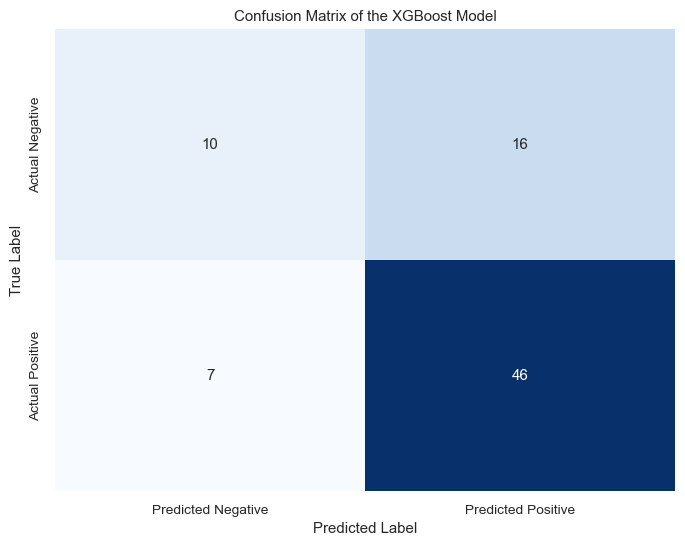

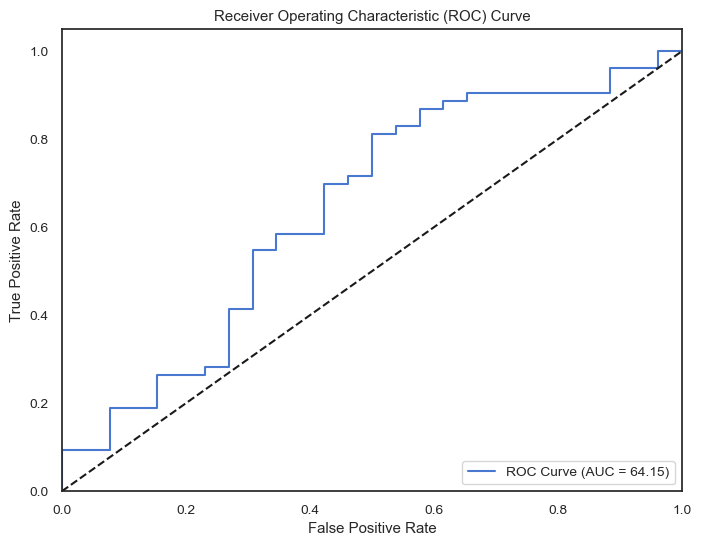

In [68]:
# Evaluate the model using the function
evaluate_xgboost(xgb_model, X_test, y_test)

In [69]:
joblib.dump(xgb_model, '../models/xgb_model.joblib')

['../models/xgb_model.joblib']

## 3: Random Forest Model

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
# Initialize the RF model
rf_model = RandomForestClassifier(random_state=42)

In [72]:
rf_model.fit(
    X_train,
    y_train
)

RandomForestClassifier(random_state=42)

In [73]:
# Predicting the target values
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

### Model Evaluation

In [74]:
def evaluate_rf(model, X_test, y_test):
    """
    Evaluates an RF model on the test data using various metrics.

    Parameters:
    - model: Trained Random Forest model (must have .predict and .predict_proba methods)
    - X_test: Test features
    - y_test: True labels for the test set

    Returns:
    - A dictionary containing all the evaluation metrics
    """
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics and convert to percentage
    accuracy = accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    roc_auc = roc_auc_score(y_test, y_pred_proba) * 100

    # Print the metrics with percentage signs
    print(f"Accuracy Score: {accuracy:.2f}%")
    print(f"F1 Score: {f1:.2f}%")
    print(f"Precision Score: {precision:.2f}%")
    print(f"Recall Score: {recall:.2f}%")
    print(f"ROC-AUC Score: {roc_auc:.2f}%")

    # Print detailed classification report
    print('\n\nClassification Report:')
    print(classification_report(y_test, y_pred))

    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        cbar=False,
        xticklabels=['Predicted Negative', 'Predicted Positive'],
        yticklabels=['Actual Negative', 'Actual Positive']
    )
    plt.title('Confusion Matrix of the Random Forest Model')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

Accuracy Score: 68.35%
F1 Score: 78.63%
Precision Score: 71.88%
Recall Score: 86.79%
ROC-AUC Score: 64.04%


Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.31      0.39        26
           1       0.72      0.87      0.79        53

    accuracy                           0.68        79
   macro avg       0.63      0.59      0.59        79
weighted avg       0.66      0.68      0.66        79



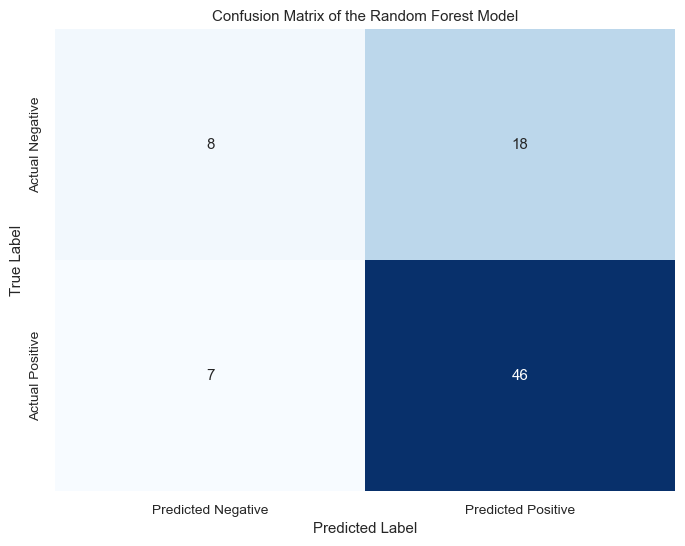

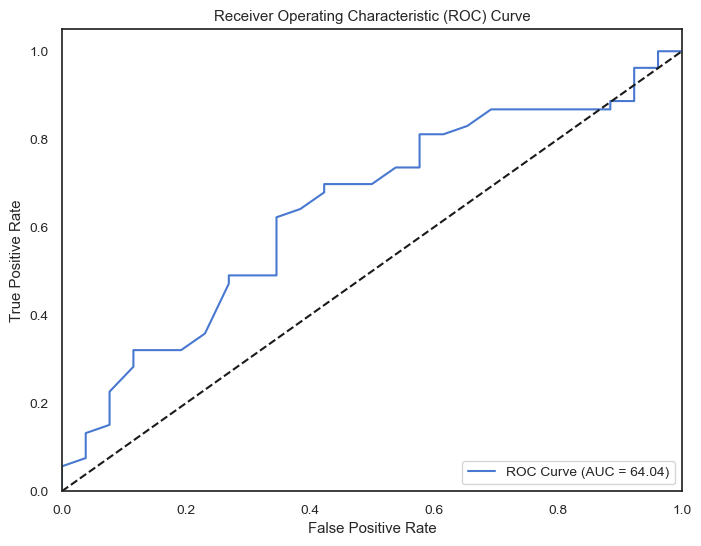

In [75]:
# Evaluate the model using the function
evaluate_rf(rf_model, X_test, y_test)

In [76]:
joblib.dump(rf_model, '../models/rf_model.joblib')

['../models/rf_model.joblib']

## 4: Support Vector Machine (SVM) – Strong Classifier for Small Data

In [77]:
from sklearn.svm import SVC

In [78]:
# Initialize the SVM model
svm_model = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)

In [79]:
svm_model.fit(
    X_train,
    y_train
)

SVC(probability=True, random_state=42)

In [80]:
# Predicting the target values
y_pred_svm = svm_model.predict(X_test)
y_pred_svm

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

### Model Evaluation

In [81]:
def evaluate_svm(model, X_test, y_test):
    """
    Evaluates a Support Vector Machine (SVM) model on the test data using various metrics.

    Parameters:
    - model: Trained SVM model (must have .predict and .predict_proba methods if probability=True)
    - X_test: Test features
    - y_test: True labels for the test set

    Returns:
    - A dictionary containing all the evaluation metrics
    """
    # Make predictions
    y_pred = model.predict(X_test)

    # SVM needs probability=True in initialization to use predict_proba
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = None  # Some SVMs may not support probability estimation

    # Calculate metrics and convert to percentage
    accuracy = accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    roc_auc = roc_auc_score(y_test, y_pred_proba) * 100 if y_pred_proba is not None else None

    # Print the metrics with percentage signs
    print(f"Accuracy Score: {accuracy:.2f}%")
    print(f"F1 Score: {f1:.2f}%")
    print(f"Precision Score: {precision:.2f}%")
    print(f"Recall Score: {recall:.2f}%")
    if roc_auc is not None:
        print(f"ROC-AUC Score: {roc_auc:.2f}%")

    # Print detailed classification report
    print('\n\nClassification Report:')
    print(classification_report(y_test, y_pred))

    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        cbar=False,
        xticklabels=['Predicted Negative', 'Predicted Positive'],
        yticklabels=['Actual Negative', 'Actual Positive']
    )
    plt.title('Confusion Matrix of the SVM Model')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC curve (if probability estimates are available)
    if y_pred_proba is not None:
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(8,6))
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show();

Accuracy Score: 68.35%
F1 Score: 79.34%
Precision Score: 70.59%
Recall Score: 90.57%
ROC-AUC Score: 61.39%


Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.23      0.32        26
           1       0.71      0.91      0.79        53

    accuracy                           0.68        79
   macro avg       0.63      0.57      0.56        79
weighted avg       0.65      0.68      0.64        79



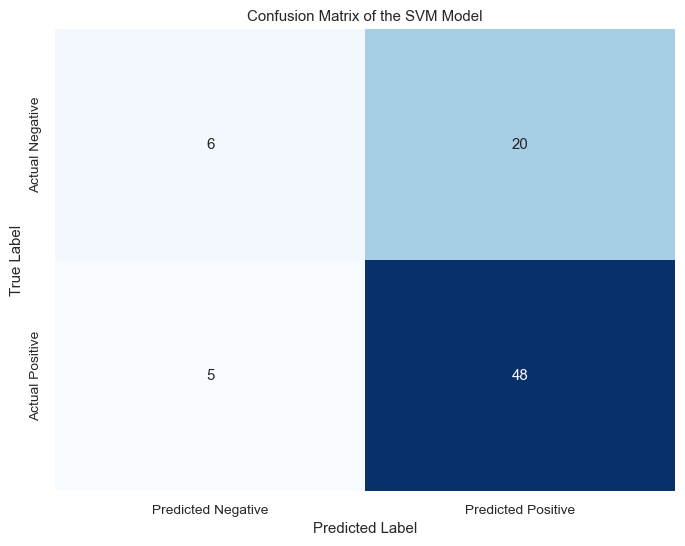

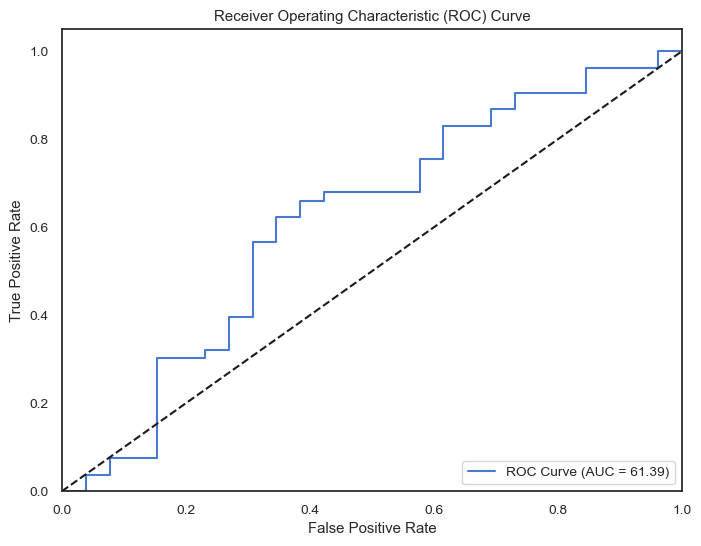

In [82]:
# Evaluate the model using the function
evaluate_svm(svm_model, X_test, y_test)

In [83]:
joblib.dump(svm_model, '../models/svm_model.joblib')

['../models/svm_model.joblib']

## 5: K-Nearest Neighbors (KNN) – Instance-Based Learning

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
# Initialize the SVM model
knn_model = KNeighborsClassifier()

In [86]:
knn_model.fit(
    X_train,
    y_train
)

KNeighborsClassifier()

In [87]:
# Predicting the target values
y_pred_knn = knn_model.predict(X_test)
y_pred_knn

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

### Model Evaluation

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
def evaluate_knn(model, X_test, y_test):
    """
    Evaluates a k-Nearest Neighbors (KNN) model on the test data using various metrics.

    Parameters:
    - model: Trained KNN model (must have .predict and optionally .predict_proba if n_neighbors > 1)
    - X_test: Test features
    - y_test: True labels for the test set

    Returns:
    - A dictionary containing all the evaluation metrics
    """
    # Make predictions
    y_pred = model.predict(X_test)

    # KNN supports predict_proba only if it is used for classification (not regression)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = None  # If predict_proba is not available, set to None

    # Calculate metrics and convert to percentage
    accuracy = accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    roc_auc = roc_auc_score(y_test, y_pred_proba) * 100 if y_pred_proba is not None else None

    # Print the metrics with percentage signs
    print(f"Accuracy Score: {accuracy:.2f}%")
    print(f"F1 Score: {f1:.2f}%")
    print(f"Precision Score: {precision:.2f}%")
    print(f"Recall Score: {recall:.2f}%")
    if roc_auc is not None:
        print(f"ROC-AUC Score: {roc_auc:.2f}%")

    # Print detailed classification report
    print('\n\nClassification Report:')
    print(classification_report(y_test, y_pred))

    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        cbar=False,
        xticklabels=['Predicted Negative', 'Predicted Positive'],
        yticklabels=['Actual Negative', 'Actual Positive']
    )
    plt.title('Confusion Matrix of the KNN Model')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC curve (if probability estimates are available)
    if y_pred_proba is not None:
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(8,6))
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show();

Accuracy Score: 63.29%
F1 Score: 75.21%
Precision Score: 68.75%
Recall Score: 83.02%
ROC-AUC Score: 59.72%


Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.23      0.29        26
           1       0.69      0.83      0.75        53

    accuracy                           0.63        79
   macro avg       0.54      0.53      0.52        79
weighted avg       0.59      0.63      0.60        79



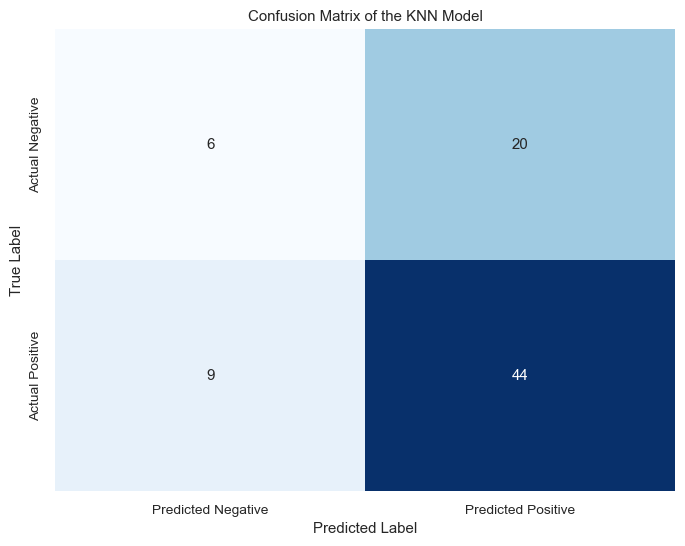

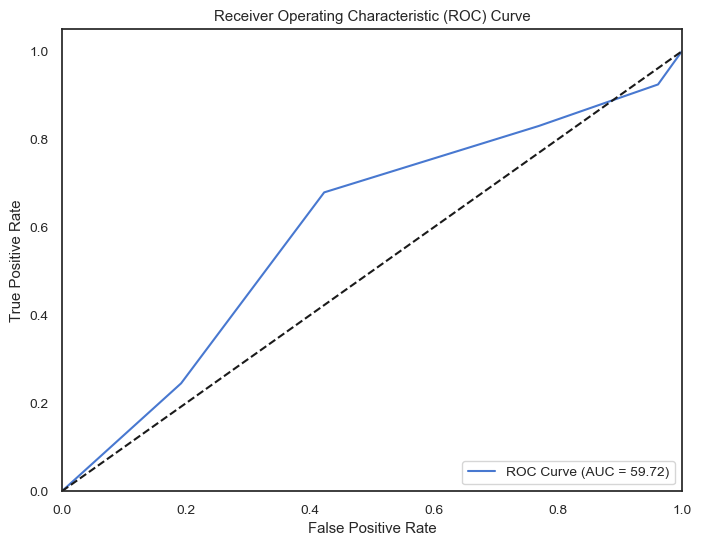

In [90]:
# Evaluate the model using the function
evaluate_knn(knn_model, X_test, y_test)

In [92]:
joblib.dump(knn_model, '../models/knn_model.joblib')

['../models/knn_model.joblib']